# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: SAI SUMANTH BODA - 1001832348

Second Student Name and ID: MAHESH KOPPALA - 1001764522



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [3 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

In [1]:
#IPython command to prepare the notebook for matplotlib
%matplotlib inline

#Array Processing
import numpy as np
#Data Analysis
import pandas as pd
from pandas import Series, DataFrame

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
import sklearn
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [2]:
#Load Heart dataset from cardio_train.csv and create dataframe
df_data = pd.read_csv ('cardio_train.csv', sep=';', encoding='latin1')

In [3]:
#print the first and last five records of your dataset. 
df_data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df_data.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [8]:
#Print the class labels.
print("class labels")
print(df_data['cardio'].unique())

print("values")
df_data['cardio'].tolist()

class labels
[0 1]
values


[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [9]:
#Split your dataset 70% for training, and 30% for testing the classifier. 
X = df_data.drop('cardio', axis=1)
y = df_data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size = 0.70)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49000, 12) (21000, 12) (49000,) (21000,)


values predicted:
[1 1 1 ... 1 0 0]
Accuracy
0.7306666666666667
Confusion Matrix
[[8478 1945]
 [3711 6866]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     10423
           1       0.78      0.65      0.71     10577

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000

Decision Tree Visualization


[Text(837.0, 1494.8999999999999, 'X[5] <= 129.5\ngini = 0.5\nsamples = 49000\nvalue = [24598, 24402]'),
 Text(418.5, 1223.1, 'X[1] <= 19941.5\ngini = 0.434\nsamples = 29123\nvalue = [19840, 9283]'),
 Text(209.25, 951.3, 'X[7] <= 2.5\ngini = 0.363\nsamples = 17924\nvalue = [13645, 4279]'),
 Text(104.625, 679.4999999999999, 'X[1] <= 16677.5\ngini = 0.347\nsamples = 17174\nvalue = [13344, 3830]'),
 Text(52.3125, 407.6999999999998, 'X[7] <= 1.5\ngini = 0.256\nsamples = 5849\nvalue = [4967, 882]'),
 Text(26.15625, 135.89999999999986, 'gini = 0.233\nsamples = 5269\nvalue = [4561, 708]'),
 Text(78.46875, 135.89999999999986, 'gini = 0.42\nsamples = 580\nvalue = [406, 174]'),
 Text(156.9375, 407.6999999999998, 'X[4] <= 64.55\ngini = 0.385\nsamples = 11325\nvalue = [8377, 2948]'),
 Text(130.78125, 135.89999999999986, 'gini = 0.319\nsamples = 3343\nvalue = [2676, 667]'),
 Text(183.09375, 135.89999999999986, 'gini = 0.408\nsamples = 7982\nvalue = [5701, 2281]'),
 Text(313.875, 679.4999999999999, '

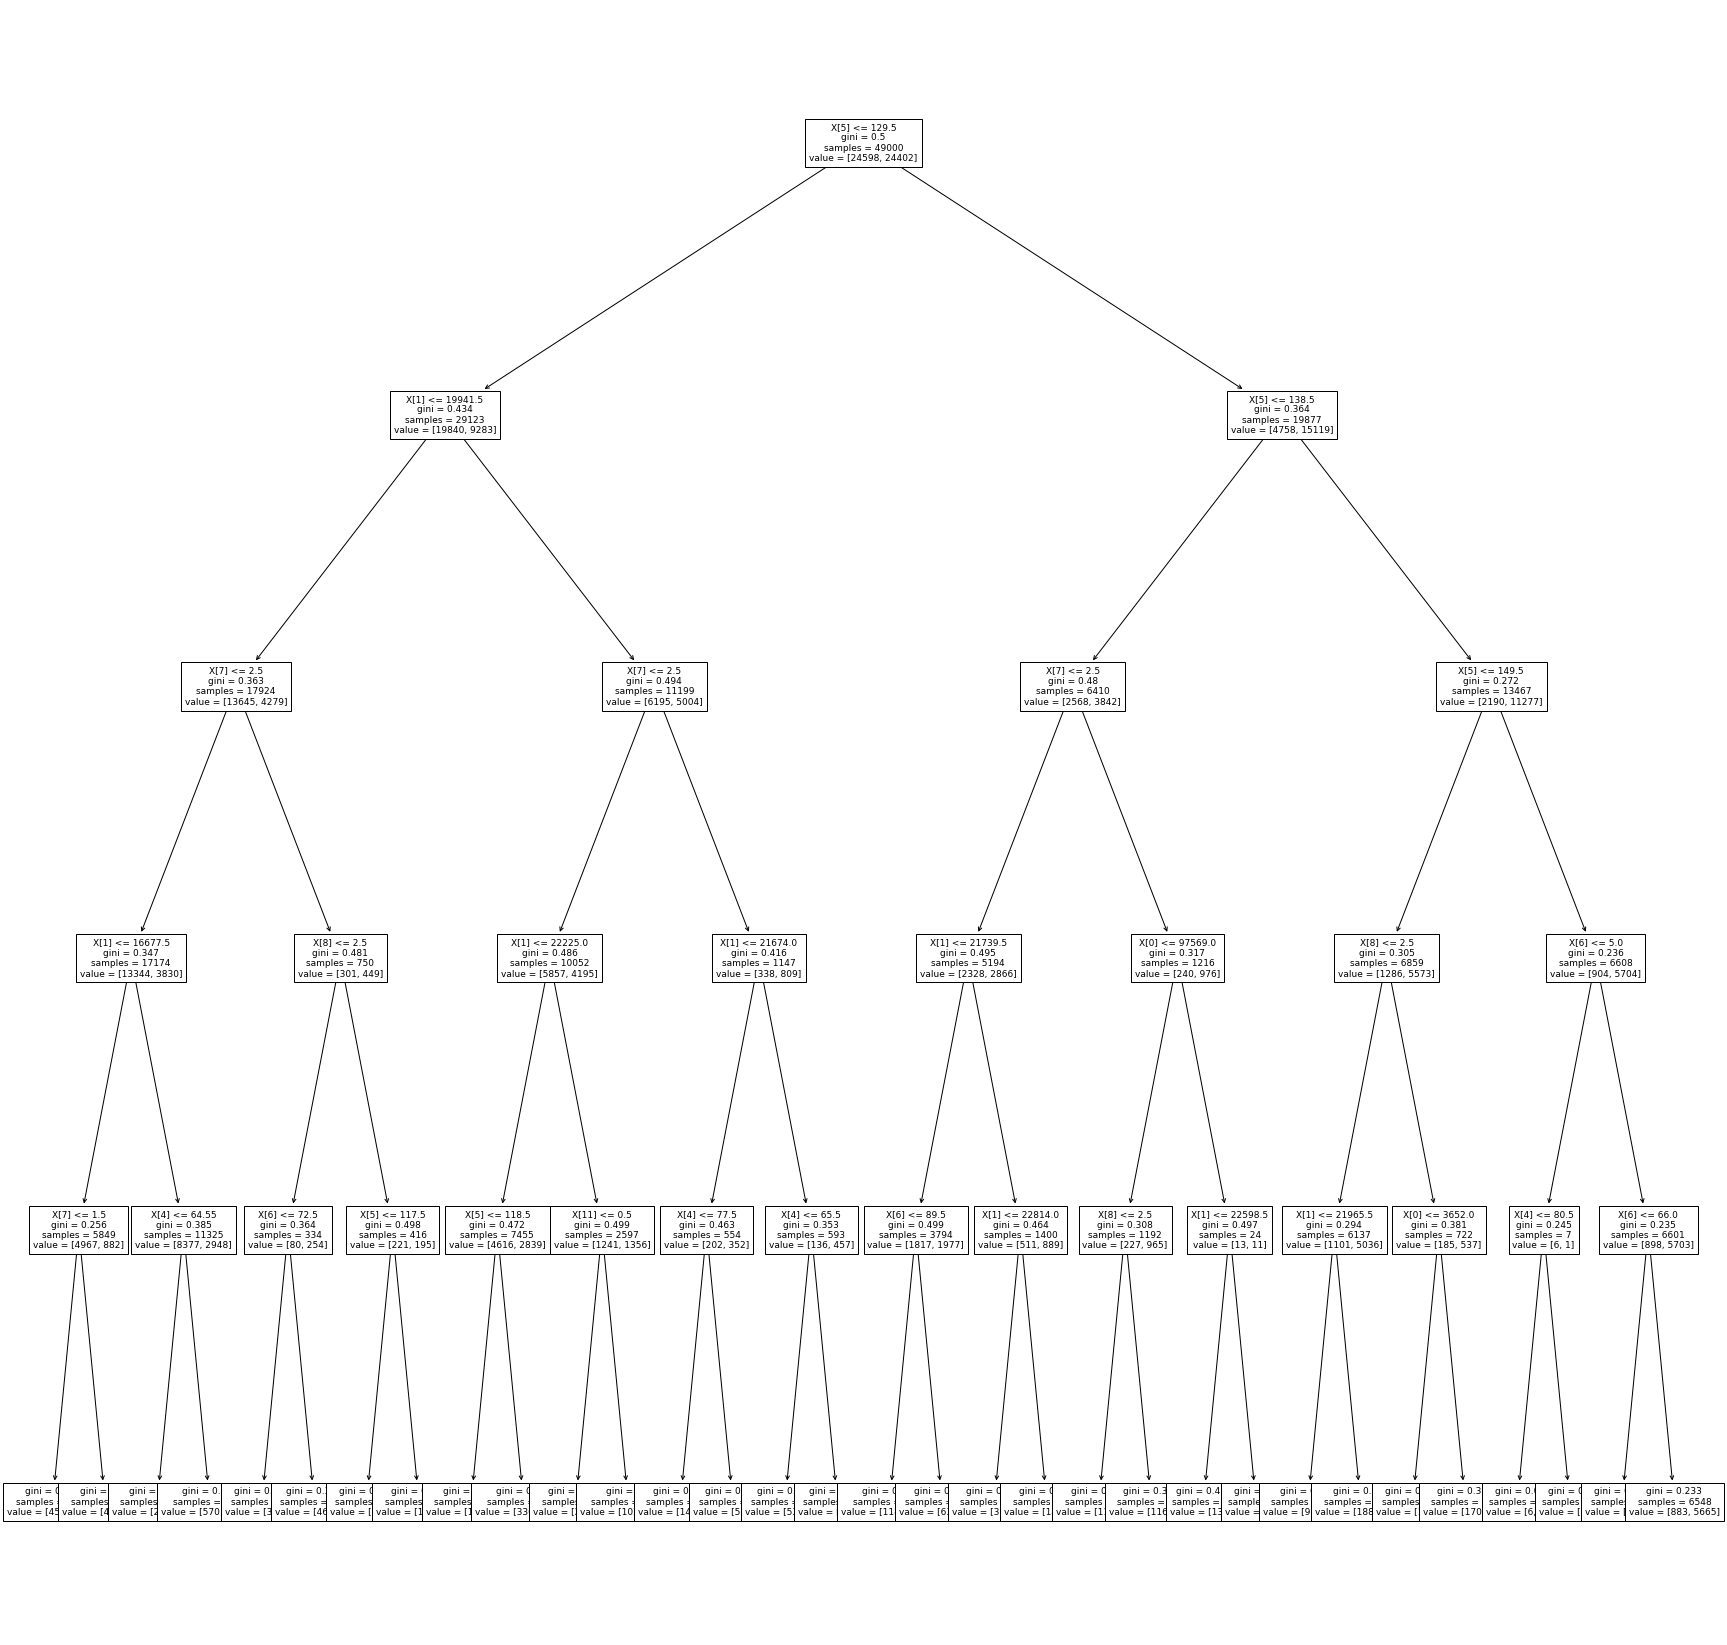

In [13]:
#DECISION TREE (GINI)
#Use gini and entropy to measure the quality of a split.
classifier_Gini = DecisionTreeClassifier (criterion = "gini", random_state = 100, max_depth = 5)

#training for decision tree
classifier_Gini = classifier_Gini.fit(X_train, y_train)

#predictions
y_predict = classifier_Gini.predict(X_test)
print("values predicted:")
print(y_predict)

#Accuracy
print("Accuracy")
print(accuracy_score(y_test,y_predict))

#Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))

#Classification Report
print("Classification Report")
print(classification_report (y_test, y_predict))

#plot
print("Decision Tree Visualization")
plt.figure(figsize=(30,30))
tree.plot_tree(classifier_Gini, fontsize = 9)

values predicted:
[1 1 1 ... 1 0 0]
Accuracy
0.7306190476190476
Confusion Matrix
[[8477 1946]
 [3711 6866]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     10423
           1       0.78      0.65      0.71     10577

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000

Decision Tree Visualization


[Text(837.0, 1494.8999999999999, 'X[5] <= 129.5\nentropy = 1.0\nsamples = 49000\nvalue = [24598, 24402]'),
 Text(418.5, 1223.1, 'X[1] <= 19858.5\nentropy = 0.903\nsamples = 29123\nvalue = [19840, 9283]'),
 Text(209.25, 951.3, 'X[7] <= 2.5\nentropy = 0.79\nsamples = 17625\nvalue = [13447, 4178]'),
 Text(104.625, 679.4999999999999, 'X[1] <= 16677.5\nentropy = 0.763\nsamples = 16896\nvalue = [13157, 3739]'),
 Text(52.3125, 407.6999999999998, 'X[7] <= 1.5\nentropy = 0.612\nsamples = 5849\nvalue = [4967, 882]'),
 Text(26.15625, 135.89999999999986, 'entropy = 0.569\nsamples = 5269\nvalue = [4561, 708]'),
 Text(78.46875, 135.89999999999986, 'entropy = 0.881\nsamples = 580\nvalue = [406, 174]'),
 Text(156.9375, 407.6999999999998, 'X[4] <= 64.55\nentropy = 0.825\nsamples = 11047\nvalue = [8190, 2857]'),
 Text(130.78125, 135.89999999999986, 'entropy = 0.717\nsamples = 3272\nvalue = [2625, 647]'),
 Text(183.09375, 135.89999999999986, 'entropy = 0.861\nsamples = 7775\nvalue = [5565, 2210]'),
 Text

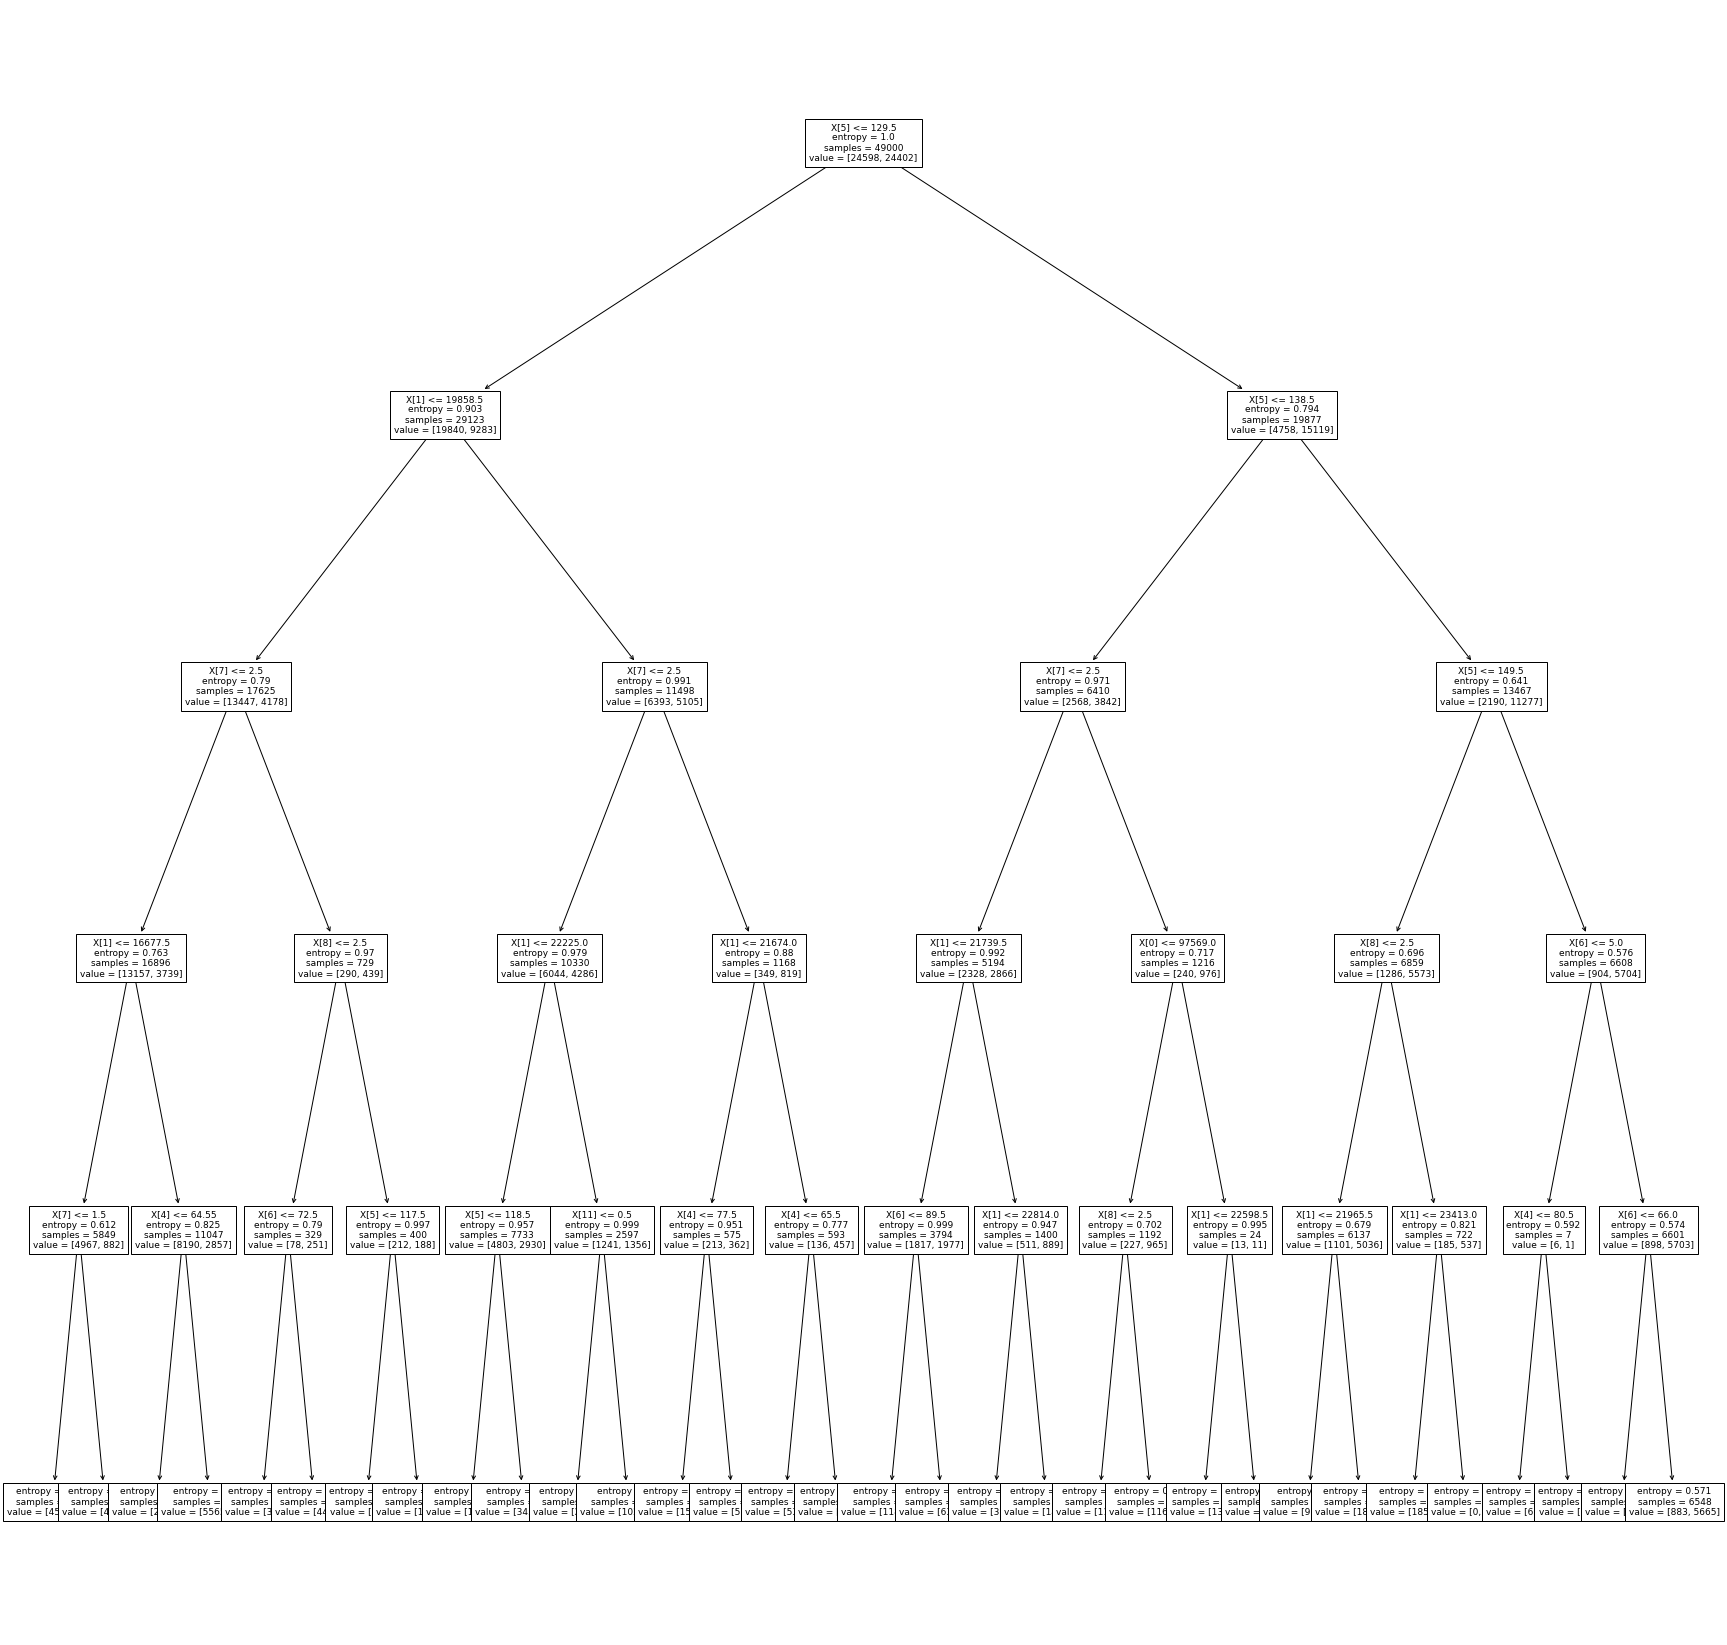

In [14]:
##DECISION TREE (ENTROPY)
#Use gini and entropy to measure the quality of a split.
classifier_Entropy = DecisionTreeClassifier (criterion = "entropy", random_state = 100, max_depth = 5)

#training for decision tree
classifier_Entropy = classifier_Entropy.fit(X_train, y_train)

#predictions
y_predict = classifier_Entropy.predict(X_test)
print("values predicted:")
print(y_predict)

#Accuracy
print("Accuracy")
print(accuracy_score(y_test,y_predict))

#Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))

#Classification Report
print("Classification Report")
print(classification_report (y_test, y_predict))

#plot
print("Decision Tree Visualization")
plt.figure(figsize=(30,30))
tree.plot_tree(classifier_Entropy, fontsize = 9)

In [15]:
#NAIVE BAYES
#Use Naive bayes classifier (Gaussian) to predict the test data
classifier_gaussian = GaussianNB()

#training
classifier_gaussian = classifier_gaussian.fit(X_train, y_train)

#predictions
y_predict = classifier_gaussian.predict(X_test)
print("values predicted:")
print(y_predict)

#Accuracy
print("Accuracy")
print(accuracy_score(y_test,y_predict))

#Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))

#Classification Report
print("Classification Report")
print(classification_report (y_test, y_predict))

values predicted:
[0 1 0 ... 1 0 0]
Accuracy
0.5656666666666667
Confusion Matrix
[[9786  637]
 [8484 2093]]
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.94      0.68     10423
           1       0.77      0.20      0.31     10577

    accuracy                           0.57     21000
   macro avg       0.65      0.57      0.50     21000
weighted avg       0.65      0.57      0.50     21000

